In [83]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
data_ = pd.read_csv("./data/pre_processed_training_data.csv")
data_.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,2,3,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,7,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,4,4,61.2,57.0,5.69,5.73,3.50,2772


<Axes: >

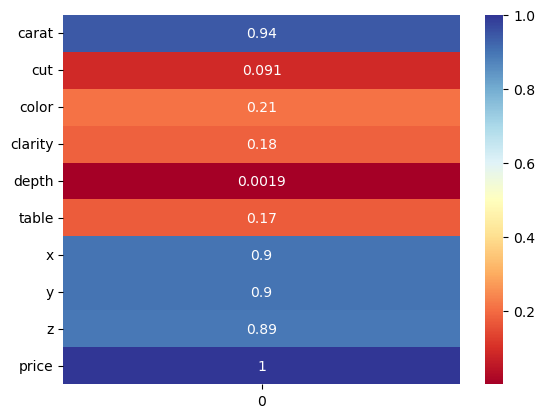

In [85]:
price_ = pd.Series(np.array(data_["price"]).reshape(-1,1).flatten())
sn.heatmap(data_.corrwith(price_).to_frame(), cmap="RdYlBu", annot=True)

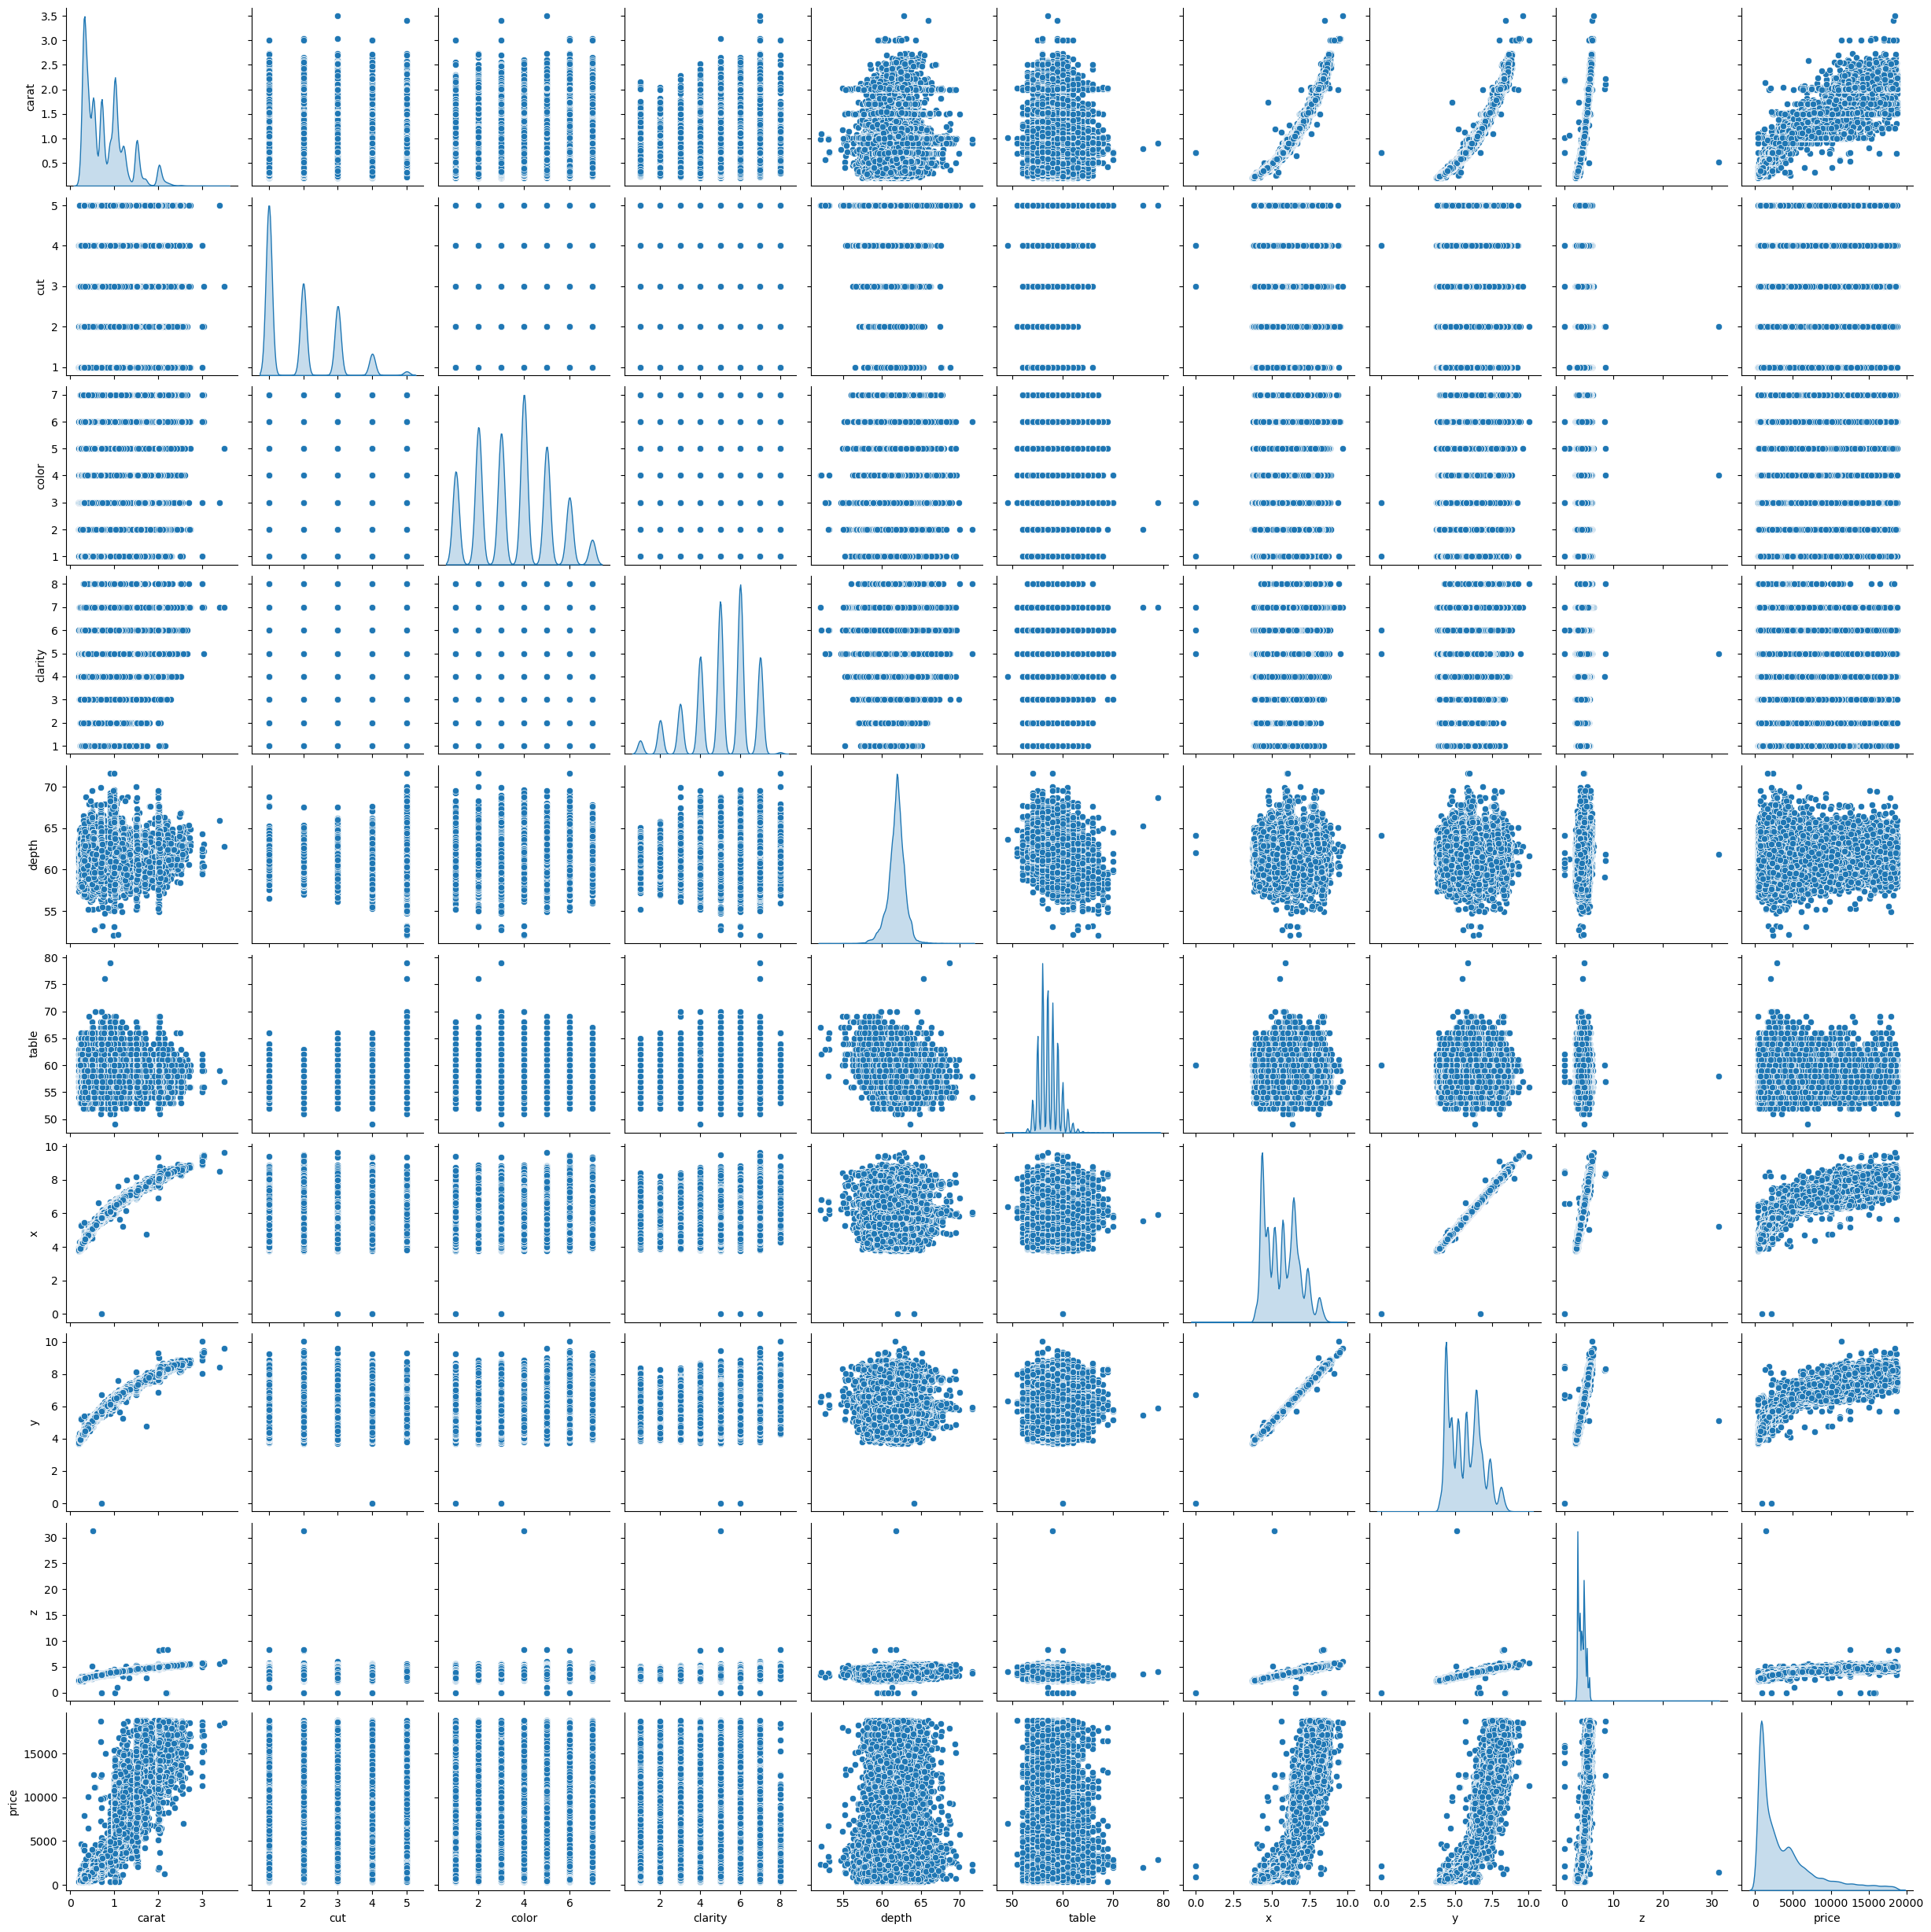

In [86]:
sn.pairplot(data_, diag_kind='kde')

In [87]:
from sklearn.impute import SimpleImputer # -> Handles Missing Values
from sklearn.preprocessing import StandardScaler # -> Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # -> Used for Encoding objects

In [88]:
# PipeLines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [89]:
datagem = pd.read_csv("./data/train.csv")
datagem.drop(labels=["id"], axis=1, inplace=True)
datagem.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [90]:
X = datagem.drop(labels=["price"], axis=1)
Y = datagem["price"]

In [91]:
X.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05


In [92]:
Y.head(2)

0    13619
1    13387
Name: price, dtype: int64

In [93]:
cat_data = X.select_dtypes(include='object').columns
num_data = X.select_dtypes(exclude='object').columns
num_data , cat_data

(Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

In [94]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['D','E','F','G','H','I','J']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [95]:
num_pipe = Pipeline( 
                    steps=[
                        ('imputer', SimpleImputer()), ('scaler', StandardScaler())
                    ])

cat_pipe = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal_encoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories]))
    ]
)

In [96]:
preprocessor = ColumnTransformer(
    [
        ('num_pipe', num_pipe, num_data),
        ('cat_pipe', cat_pipe, cat_data)
    ]
)

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

In [98]:
preprocessor.fit_transform(x_train)

array([[-0.97543926, -0.84960654, -0.12153081, ...,  4.        ,
         5.        ,  5.        ],
       [ 0.2351953 ,  1.83363716, -0.12153081, ...,  1.        ,
         1.        ,  2.        ],
       [ 0.49461699,  0.81585507,  0.39980029, ...,  3.        ,
         3.        ,  4.        ],
       ...,
       [ 0.45138004,  1.55606023, -0.6428619 , ...,  1.        ,
         3.        ,  2.        ],
       [ 0.66756478, -1.77486298,  1.44246248, ...,  4.        ,
         3.        ,  4.        ],
       [ 0.25681377,  0.81585507, -0.12153081, ...,  4.        ,
         3.        ,  2.        ]])

In [99]:
preprocessor.transform(x_test)

array([[-0.56468825, -0.94213218, -0.6428619 , ...,  3.        ,
         1.        ,  3.        ],
       [-0.17555571,  1.00090636, -0.12153081, ...,  2.        ,
         4.        ,  2.        ],
       [-1.06191316,  0.2607012 , -0.12153081, ...,  4.        ,
         4.        ,  7.        ],
       ...,
       [-0.19717419, -3.34779894,  1.44246248, ...,  3.        ,
         6.        ,  3.        ],
       [-0.82410994, -0.20192702, -0.12153081, ...,  4.        ,
         3.        ,  2.        ],
       [ 2.61322747, -0.75708089,  1.44246248, ...,  3.        ,
         6.        ,  3.        ]])

In [100]:
preprocessor.get_feature_names_out()

array(['num_pipe__carat', 'num_pipe__depth', 'num_pipe__table',
       'num_pipe__x', 'num_pipe__y', 'num_pipe__z', 'cat_pipe__cut',
       'cat_pipe__color', 'cat_pipe__clarity'], dtype=object)

In [101]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train), columns=preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test), columns=preprocessor.get_feature_names_out())

In [102]:
x_train

,num_pipe__carat,num_pipe__depth,num_pipe__table,num_pipe__x,num_pipe__y,num_pipe__z,cat_pipe__cut,cat_pipe__color,cat_pipe__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,4.0,5.0,5.0
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,1.0,1.0,2.0
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,3.0,3.0,4.0
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,3.0,3.0,3.0
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...
135496,-1.040295,-0.016876,-0.642862,-1.268122,-1.244270,-1.239078,4.0,1.0,2.0
135497,0.991842,0.168176,-0.642862,1.048629,1.114501,1.079486,4.0,3.0,1.0
135498,0.451380,1.556060,-0.642862,0.516768,0.588314,0.702719,1.0,3.0,2.0
135499,0.667565,-1.774863,1.442462,0.868337,0.951202,0.688228,4.0,3.0,4.0


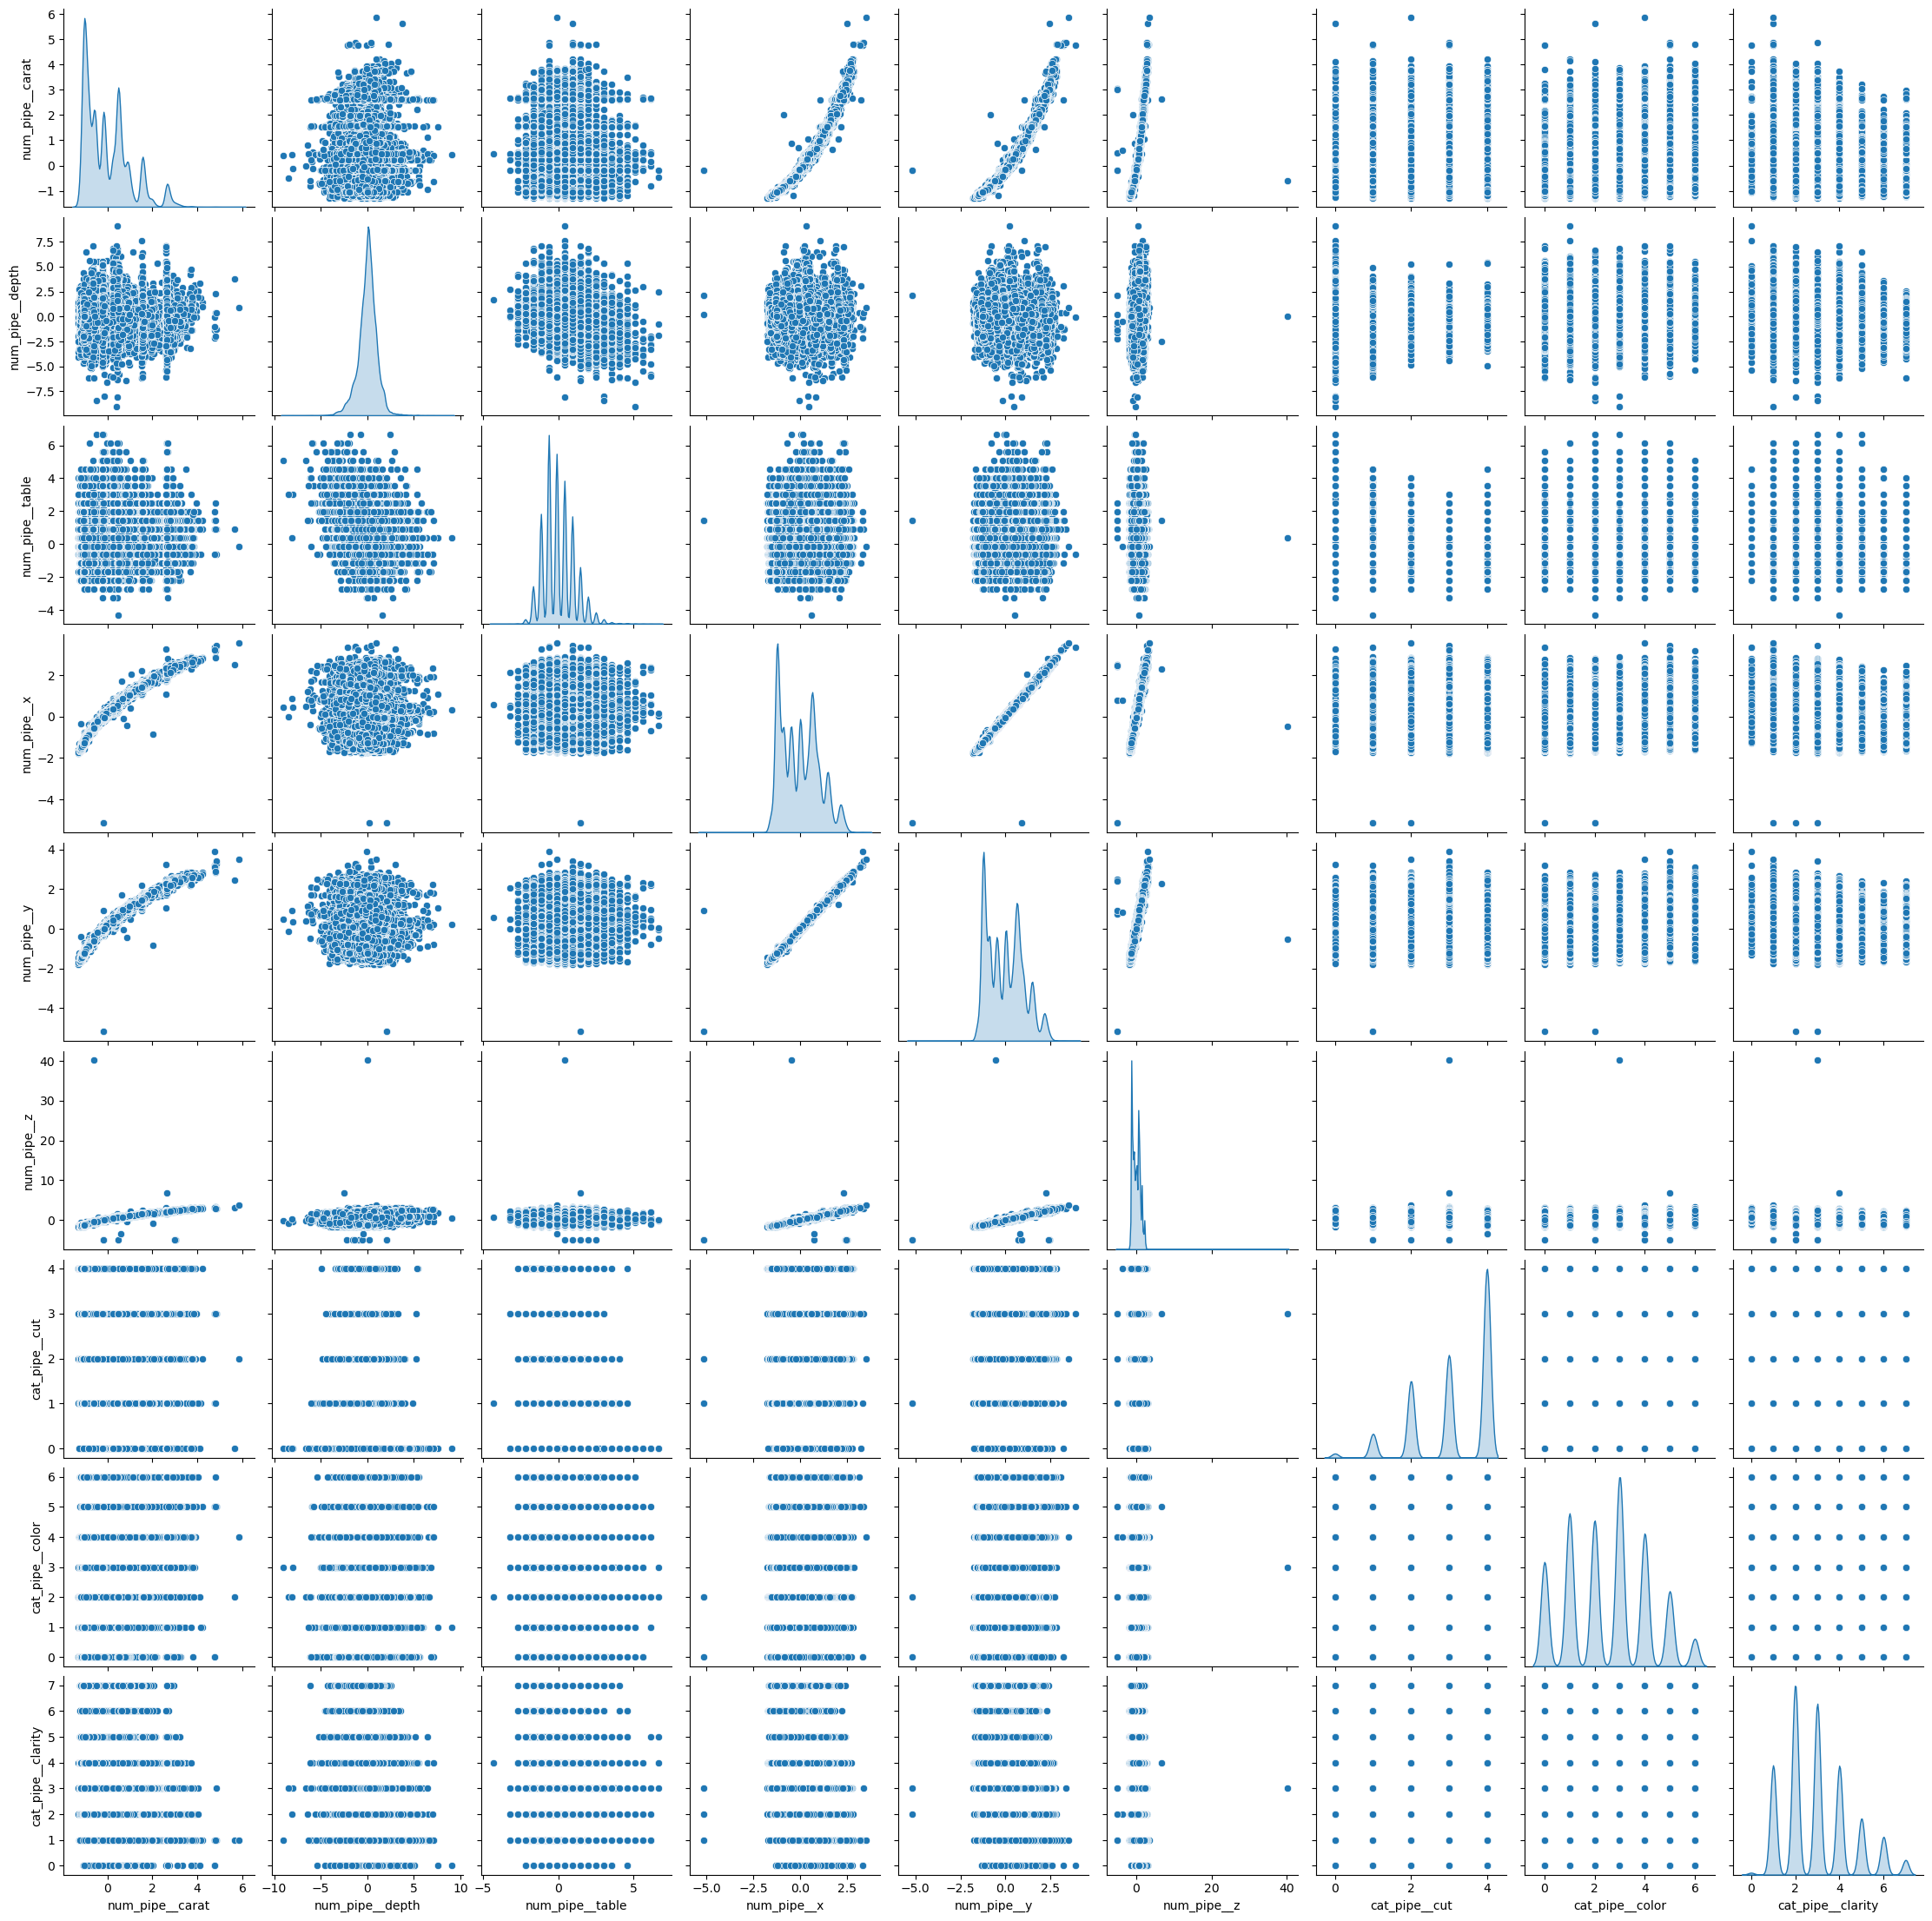

In [112]:
sn.pairplot(x_train, diag_kind='kde')

In [103]:
x_test

,num_pipe__carat,num_pipe__depth,num_pipe__table,num_pipe__x,num_pipe__y,num_pipe__z,cat_pipe__cut,cat_pipe__color,cat_pipe__clarity
0,-0.564688,-0.942132,-0.642862,-0.429765,-0.464061,-0.500036,3.0,1.0,3.0
1,-0.175556,1.000906,-0.121531,-0.042137,-0.028595,0.036132,2.0,4.0,2.0
2,-1.061913,0.260701,-0.121531,-1.304180,-1.298703,-1.268060,4.0,4.0,7.0
3,0.970223,-0.201927,1.963794,1.048629,0.996563,0.978049,3.0,3.0,3.0
4,-0.932202,-1.312235,0.399800,-1.006699,-0.990248,-1.065186,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
58067,1.013460,1.185958,-0.642862,1.003556,1.041924,1.151941,2.0,4.0,3.0
58068,-0.997058,0.260701,-1.164193,-1.141917,-1.126331,-1.108659,4.0,2.0,6.0
58069,-0.197174,-3.347799,1.442462,0.102096,0.071199,-0.224706,3.0,6.0,3.0
58070,-0.824110,-0.201927,-0.121531,-0.853450,-0.881382,-0.876803,4.0,3.0,2.0


In [104]:
# Model Training with multiple model

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [105]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r_mse = np.sqrt(mse)
    r2_sq = r2_score(true, predicted)
    return mae, r_mse,r2_sq

In [106]:
models = {
    'Linear_Reg' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'ElasticNet' : ElasticNet()    
}

trained_model_list = []
model_list = []
r2_list = []

In [107]:
for model, model_fun in models.items():
    # print(model)
    model_fun.fit(x_train, y_train)
    y_pred = model_fun.predict(x_test)
    mae, r_mse, r2_sq = evaluate_model(y_test, y_pred)
    print(type(model_fun).__name__)
    model_list.append(model)
    
    print('Model Training Performance')
    print('RMSE :', r_mse)
    print('MAE :', mae)
    print('R2 Score :', r2_sq*100)
    
    r2_list.append(r2_sq)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE : 1013.9047094344003
MAE : 674.0255115796847
R2 Score : 93.68908248567512


Lasso
Model Training Performance
RMSE : 1013.8723151049944
MAE : 675.2036880701619
R2 Score : 93.68948574778251


Ridge
Model Training Performance
RMSE : 1013.9058997761066
MAE : 674.0565132296049
R2 Score : 93.68906766741327


ElasticNet
Model Training Performance
RMSE : 1513.9140350229761
MAE : 1050.7468664314322
R2 Score : 85.92978759337907




In [108]:
trained_model_list, model_list

([], ['Linear_Reg', 'Lasso', 'Ridge', 'ElasticNet'])

In [109]:
r2_list

[0.9368908248567511,
 0.9368948574778251,
 0.9368906766741327,
 0.8592978759337908]

In [110]:
import os
import pickle

In [111]:
model_list
os.makedirs('trained_model', exist_ok=True)
for model, model_name in models.items():
    model_file = os.path.join('trained_model', f'{model}.pickle')
    with open(model_file, 'wb') as file:
        pickle.dump(model_name,file)

In [1]:
from src.DiamondPricePrediction.logger import logging
logging.info("Testing logging module.")

ModuleNotFoundError: No module named 'src'